# Le jeu de données contaminé par le robot

### Import des librairies 

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import random 
from sklearn.utils import shuffle
from decimal import Decimal
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Question 1 

In [124]:
#Import de la base de donnée depuis internet
#Attention il n'y a pas de header, il faut donc le préciser lors de l'appel de la fonction
df_diab=pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", header=None, sep = ",")

#La derniere variable est la variable à expliquer, on la renomme Y par convention
df_diab.rename(columns={210: 'Y'}, inplace=True)

#On affiche le nombre de lignes de notre df :
n = len(df_diab)
print(f"Nombre d'observations : {n}")

#On affiche le nombre de variables explicatives, on enlève 1 au nombre de colonne car la dernière colonne est
#la variable à expliquer
p = len(df_diab.columns) - 1
print(f"Nombre de variables explicatives : {p}")


#On affiche les 5 premières lignes de la df
df_diab.head()


Nombre d'observations : 442
Nombre de variables explicatives : 210


,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,Y
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


### Question 2 

In [125]:
#describe nous donne des infos sur la répartition statistique des variables de la df
df_diab.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


On voit que la variable à expliquer (colonne Y) n'est ni centrée (Mean =\= 0), ni réduite (std =\= 1). 

Il semble en revanche que les variables explicatives sont centrées réduites, mais elles ne sont pas toutes facilement accessible via le describe, car beaucoup trop de colonnes.

Afin de s'assurer que toutes les variables explicatives sont centrées réduites, je vérifie à l'aide d'un petit algorithme qu'on a mean = 0 et std = 1 pour chaque colonne

In [126]:
L=[]
eps = 0.01
#On ajoute dans une liste les colonnes pour lesquelles la variable explicative n'est pas centrée réduite
for i in range(210):
    s=""
    mean = df_diab[i].mean()
    std = df_diab[i].std()
    if ((abs(mean) > eps) or (abs(std-1) > eps)):
        s+=f"La colonne {i} n'est pas centrée. "
    if abs(std-1) > eps:
        s+=f"La colonne {i} n'est pas réduite."
    if s:
        print(s)
        L.append(i)
if not L:
    print("Toutes les colonnes sont centrées réduites")


Toutes les colonnes sont centrées réduites


On voit bien que toutes nos colonnes sont donc centrées et réduites en dehors de la colonne 210 qui est notre variable à expliquer.

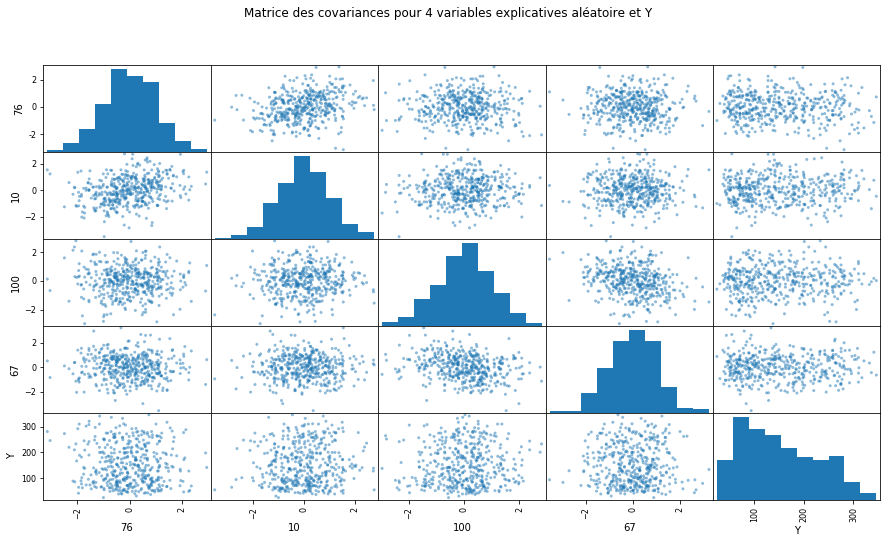

In [127]:
# On choisit 4 colonnes prises au hasard et on y ajoute la colonne de la variable à expliquer.

rand_columns = [random.randint(0,209) for i in range(4)]

#On ajoute Y
rand_columns.append("Y")

#On génère une sous dataframe composée uniquement de nos 5 colonnes
df_diab_5 = df_diab[rand_columns]

#On utilise la fonction scatter_matrix, qui nous trace directement ce que nous désirons.
scatter_matrix(df_diab_5,figsize=(15, 8))
plt.suptitle('Matrice des covariances pour 4 variables explicatives aléatoire et Y')
plt.show()

On n'observe aucune corélation. La base initiale comporte uniquement 10 covariables potentiellement corrélées à Y, avec 200 variables explicatives inapproprié, il n'y a que peu de chance d'afficher l'une des vrais variables explicatives sur notre graphe.

### Question 3

Text(0,0.5,'valeur propre')

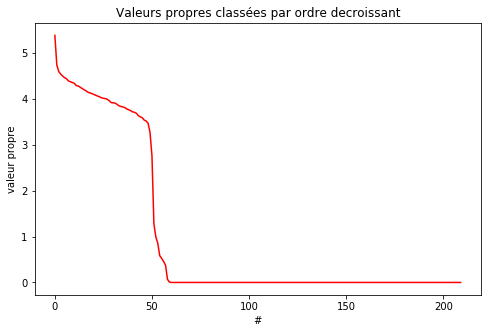

In [128]:
#On récupère la matrice de corrélation de notre dataframe
corr_mat = df_diab[list(range(210))].corr()

#On diagonalise cette matrice
diag_corr_eigh = sorted(np.linalg.eigh(corr_mat)[0],reverse=True)

#nb de valeurs propres :
v = len(diag_corr_eigh)
#On prépare le graph de décroissance des valeurs propres
plt.figure(11,figsize=(8,5))
plt.plot(range(v),diag_corr_eigh,"r")
plt.title("Valeurs propres classées par ordre decroissant", fontsize = 12)
plt.xlabel("#")
plt.ylabel("valeur propre")

Comme son  nom l'indique, la matrice de corrélation représente les corrélations qu'il existe entre les covariables. Lorsqu'on la diagonalise, on se place dans un espace crée par des vecteurs combinaisons linéaires de nos variables de bases et seul la correlation

Lorsque les valeurs propres sont proches de 0 cela veut dire que la combinaison linéaire obtenue est insignifiante vis à vis des combinaisons linéaires grandes. 

On voit graphiquement qu'après les 60 premières valeurs propres, toutes les autres sont nulles, aussi il est cohérent de se limiter à uniquement 60 valeurs propres

### Question 4 

In [129]:
#On mélange nos données

alpha = 0.8
imax= round(alpha*len(df_diab_shuff))

#On garde les premiers 80% pour le set de train
df_diab_train = df_diab_shuff.iloc[:imax]

#On prend les 20% restant pour le test
df_diab_test = df_diab_shuff.iloc[imax:]

print(f"la df train possède : {len(df_diab_train)} échantillons")
print(f"la df test possède : {len(df_diab_test)} échantillons")


la df train possède : 282 échantillons
la df test possède : 71 échantillons


### Question 5

In [611]:
#On sépare les variables explicatives de la variable a expliquer
#u=random.randint(0,1000)
X_train, X_test, Y_train, Y_test = train_test_split(df_diab[list(range(210))], df_diab["Y"], test_size=0.2, random_state=2904)
#On calcul la matrice de corrélation et les vecteurs propres pour l'échantillon de train avec la fonction eigh
corr_mat_train = X_train.corr()


n_train = len(Y_train)
n_test = len(Y_test)

#On garde les 60 plus grandes valeurs propres
diag_corr_eig_train = np.linalg.eigh(corr_mat_train)[0][-60:]

#Même chose pour les vecteurs propres
diag_corr_vec_train = np.linalg.eigh(corr_mat_train)[1][-60:]

#On reconstitue le dataset à l'aide les 60 relations contenues dans les vecteurs propres
ACP_X_train = X_train.dot(np.transpose(diag_corr_vec_train))
ACP_X_test = X_test.dot(np.transpose(diag_corr_vec_train))

#On peut maintenant réaliser la regression linéaire à l'aide de sklearn sur le model ACP, et sur le model classique
model_ACP = linear_model.LinearRegression().fit(ACP_X_train,Y_train)
model_classique = linear_model.LinearRegression().fit(X_train,Y_train)


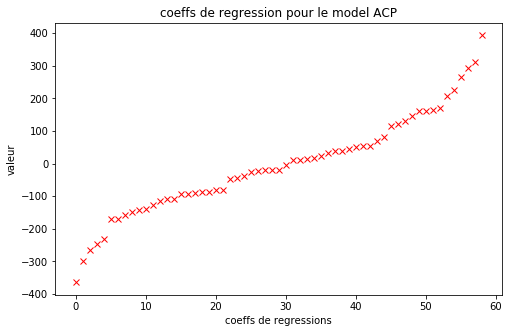

In [612]:
#On trace les valeurs de l'estimateur calculés, or intercept:
plt.figure(figsize=(8,5))
plt.plot(range(len(model_ACP.coef_)-1),sorted(model_ACP.coef_[1:]),"xr")
plt.title("coeffs de regression pour le model ACP", fontsize = 12)
plt.xlabel("coeffs de regressions")
plt.ylabel("valeur")

plt.show()

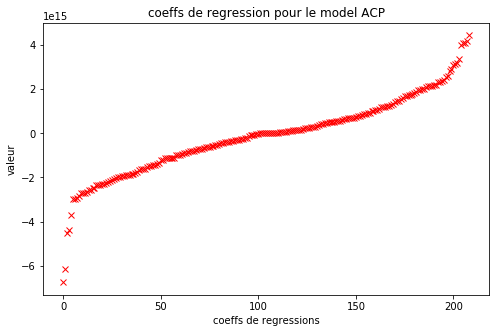

In [613]:
#On trace les valeurs de l'estimateur calculés, or intercept:
plt.figure(figsize=(8,5))
plt.plot(range(len(model_classique.coef_)-1),sorted(model_classique.coef_[1:]),"xr")
plt.title("coeffs de regression pour le model ACP", fontsize = 12)
plt.xlabel("coeffs de regressions")
plt.ylabel("valeur")

plt.show()

On remarque que dans le modèle classique, certains des coefficients de la regression explosent (10^16 !), là où on reste sur des valeurs raisonnables avec le modèle ACP (+/- 100)

### Question 6

In [614]:
#Valeurs de l'intercept pour les deux relations précedente
intercept_classique = model_classique.intercept_
intercept_ACP = model_ACP.intercept_

print(f"L'intercept pour le modèle classique vaut : {round(intercept_classique,4)}")
print(f"L'intercept pour le modèle ACP vaut : {round(intercept_ACP,4)}")

L'intercept pour le modèle classique vaut : 154.4255
L'intercept pour le modèle ACP vaut : 154.2615


Normalement, l'intercept est égal exactement à la moyenne des Y pour des variables centrées. Ici les variables explicatives du modèle initiales ne sont pas exactement centrées réduites, puisque tronquée. De même les variables ACP ne sont pas centrées réduites par construction.  

In [615]:
#On repasse en df
df_ACP_X_train = pd.DataFrame(ACP_X_train)

#On centre et normalise les données
df_ACP_X_train_reduit=(df_ACP_X_train-df_ACP_X_train.mean())/df_ACP_X_train.std()

#On entraine notre nouveau modèle centré réduit 
model_ACP_reduit = linear_model.LinearRegression().fit(df_ACP_X_train_reduit,Y_train)
intercept_ACP_reduit = model_ACP_reduit.intercept_

print(f"L'intercept pour le modèle ACP reduit vaut : {round(intercept_ACP_reduit,4)}")

#On calcul la valeur moyenne de nos Y_train
avg_Y_train = Y_train.mean()

print(f"La moyenne de Y_train vaut : {round(avg_Y_train,4)}")

L'intercept pour le modèle ACP reduit vaut : 153.238
La moyenne de Y_train vaut : 153.238


Après recentrage, on retrouve bien l'intercept ACP = moyenne Y_train

### Question 7

In [616]:
y_pred_classique = model_classique.predict(X_test)
y_pred_ACP = model_ACP.predict(ACP_X_test)

#On calcul les résidues de prédiction dans les deux cas
eps_classique = Y_test - y_pred_classique
eps_ACP = Y_test - y_pred_ACP

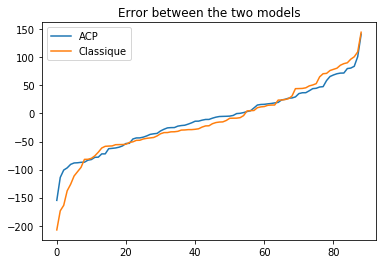

In [617]:
plt.plot(range(len(eps_ACP)),sorted(eps_ACP))
plt.plot(range(len(eps_classique)),sorted(eps_classique))
plt.legend(("ACP","Classique"))
plt.title("Error between the two models")
plt.show()
plt.show()

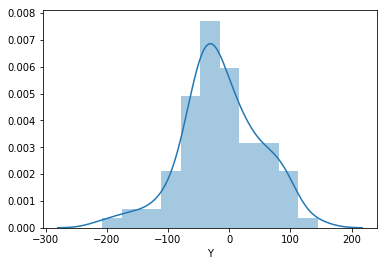

In [618]:
#Histograme des résidues cas classique
sns.distplot(eps_classique);

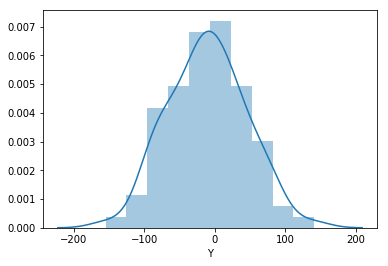

In [619]:
#Histograme des résidues ACP
sns.distplot(eps_ACP);

In [620]:
#On calcul le coefficient de determination dans les deux cas
r_classique = model_classique.score(X_test,Y_test)
r_ACP = model_ACP.score(ACP_X_test,Y_test)

print(f"Coefficient de determination, modèle classique : {r_classique}")
print(f"Coefficient de determination, modèle ACP : {r_ACP}")

Coefficient de determination, modèle classique : 0.22981445544156942
Coefficient de determination, modèle ACP : 0.45493386794749424


In [621]:
#On calcul le risque de prédiction pour l'échantillon test : 
risque_pred_classique = (Y_test-y_pred_classique).T@(Y_test-y_pred_classique)/n_test
risque_pred_ACP = (Y_test-y_pred_ACP).T@(Y_test-y_pred_ACP)/n_test

print(f"Le risque de prédiction du modèle classique est {round(risque_pred_classique,4)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP,4)}")

Le risque de prédiction du modèle classique est 4350.134
Le risque de prédiction du modèle ACP est 3078.6227


### Question 8 

In [622]:
def one_clmn_reg(X,Y):
    """Output b and p"""
    X_mat = X.copy()
    
    #On calcul la regression linéaire pour X
    model = linear_model.LinearRegression().fit(X,Y)
    
    #On calcul également sigma
    sigma = np.sqrt((Y - model.predict(X_mat)).T@(Y - model.predict(X_mat))/(len(Y)-2))
    
    #On trouve b
    b=model.coef_[0]
    
    #On calcul la matrice de gram associée à X
    X_mat["intercect"]=np.ones(len(X))
    Gram =  X_mat.T@X_mat
    
    #On en déduit T
    T = abs(b/(sigma*np.sqrt((np.linalg.inv(Gram))[1,1])))
    #On calcul p 
    p = 2*(1-stats.norm.cdf(T))
    #On calcul le résidu
    r = Y - (X*b)[(X*b).columns[0]]

    
    return (p,b,r)

def best_p(X,Y):
    """Cherche la meilleur composante parmi les variables explicatives"""
    """On stock également la totalité des p value"""
    p_list = []
    p_sup = 1
    b_sup = 0
    col_sup = X.columns[0]
    for col in X.columns:
        p,b,r = one_clmn_reg(X[[col]],Y)
        p_list.append(p)
        if p < p_sup:
            p_sup = p
            b_sup = b
            r_sup = r
            col_sup = col
    return (p_sup, b_sup, r_sup, col_sup, p_list)

def fwd_selec(X,Y,eps=1):
    """Applique l'algorithme de fwd selection"""
    
    X_c = X.copy()
    p_l = []
    b_l = []
    col_l = []
    
    #full_p est la liste complète des p valeurs à chaque tour d'algoritme
    full_p = []
    #On récupère l'intersept
    b0 = Y.mean()
    p=0
    residu = Y - Y.mean()
    while (p<eps and len(X_c.columns)):
        #Tant qu'il y a des colonnes de X, on cherche le coefficient dans la prochaine direction
        p,b,residu,col,p_list = best_p(X_c,residu)
        full_p.append((p_list,X_c.columns.values))
        
        #On retire alors la colonne qui ne nous sert plus
        X_c.pop(col)

        p_l.append(p)
        b_l.append(b)
        col_l.append(col)
    return p_l,b_l,col_l,full_p
              
p,b,col,full_p = fwd_selec(X_train,Y_train)

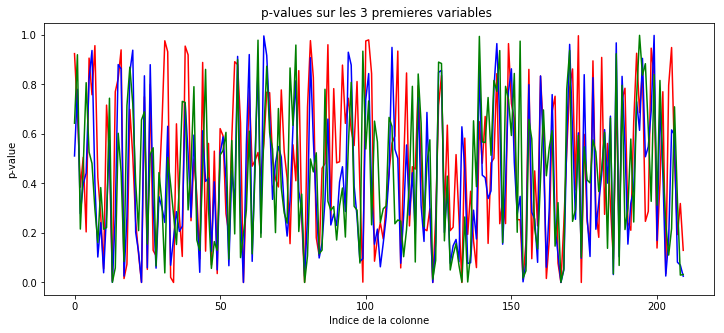

In [623]:
#On plot les valeurs des p_values et leurs valeurs
plt.figure(figsize=(12,5))
plt.plot(full_p[0][1],full_p[0][0],"r-")
plt.plot(full_p[1][1],full_p[1][0],"b-")
plt.plot(full_p[2][1],full_p[2][0],"g-")
plt.title("p-values sur les 3 premieres variables ", fontsize = 12)
plt.xlabel("Indice de la colonne")
plt.ylabel("p-value")

plt.show()

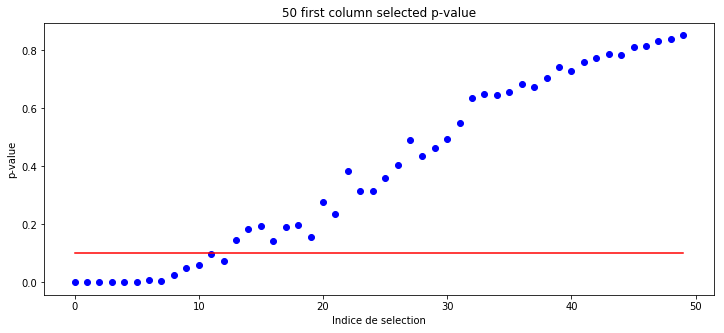

In [624]:
#On affiche le graph des 50 premières p-values
plt.figure(figsize=(12,5))
plt.plot(range(50),p[:50],"bo")
plt.plot(range(50),np.ones([50])*0.1,"r-")
plt.title("50 first column selected p-value", fontsize = 12)
plt.xlabel("Indice de selection")
plt.ylabel("p-value")

plt.show()

On selectionne uniquement les variables dont la p-value est inférieur à 0.1

In [625]:
#On zip les p values avec les colonnes associées
p_col = zip(p,col)
#On ne garde que les colonnes dont la p_value est supérieur à 0.1: 
fwd_col = [elmt[1] for elmt in p_col if elmt[0]<0.1]

print("Ci-dessous, la liste des variables explicatives gardées après selection fwd, dans l'ordre :")
print(fwd_col)

Ci-dessous, la liste des variables explicatives gardées après selection fwd, dans l'ordre :
[34, 58, 79, 167, 135, 123, 129, 13, 183, 204, 5, 35, 53]


In [626]:
#On applique la regression linéaire à la liste établi au dessus
model_fwd = linear_model.LinearRegression().fit(X_train[fwd_col],Y_train)
Y_fwd_pred = model_fwd.predict(X_test[fwd_col])
risk_predict_fwd = (Y_test - Y_fwd_pred).T@(Y_test - Y_fwd_pred)/len(Y_test)

print(f"Le risque de prédiction du modèle classique est {round(risque_pred_classique)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP)}")
print(f"Risque de prediction après la fwd selection : {round(risk_predict_fwd)}")


Le risque de prédiction du modèle classique est 4350.0
Le risque de prédiction du modèle ACP est 3079.0
Risque de prediction après la fwd selection : 2937.0


On constate que le risque de prédiction avec nos variables séléctionnés est bien meilleur que le risque obtenue par la regression linéaire sur les 210 variables. Il est légèrement meilleur que celui de la sélection par ACP

### Question 11

In [627]:
#On concatene les X et Y dans le même dataframe
df_train = X_train.copy()
df_train["Y"] = Y_train

#On mélange le tout
df_train_shuffle = shuffle(df_train)

#On split en 4 fold égaux
folds = np.split(df_train_shuffle, [int(0.25*len(df_train_shuffle)),
                                    int(0.5*len(df_train_shuffle)),
                                    int(0.75*len(df_train_shuffle))])

#On montre les index retenues pour chaque fold 
k=1
for fold in folds:
    print(f"Indexe retenu pour le fold {k} :\n {list(fold.index)} \n")
    k+=1

Indexe retenu pour le fold 1 :
 [186, 430, 286, 210, 87, 334, 175, 390, 221, 171, 217, 140, 154, 26, 49, 341, 257, 347, 302, 425, 344, 218, 194, 258, 386, 353, 411, 328, 135, 113, 158, 338, 43, 151, 10, 267, 206, 262, 45, 197, 14, 401, 106, 419, 200, 66, 143, 127, 31, 376, 105, 90, 397, 27, 380, 273, 414, 81, 13, 251, 57, 358, 255, 15, 320, 391, 96, 368, 204, 199, 231, 331, 288, 240, 287, 236, 325, 309, 36, 374, 249, 82, 172, 294, 319, 208, 335, 112] 

Indexe retenu pour le fold 2 :
 [176, 137, 83, 18, 281, 289, 201, 291, 292, 305, 234, 433, 180, 170, 16, 256, 184, 268, 73, 382, 299, 366, 279, 177, 53, 21, 142, 413, 354, 297, 389, 95, 388, 92, 359, 362, 222, 187, 423, 24, 371, 311, 260, 77, 51, 270, 235, 139, 326, 88, 182, 343, 46, 212, 131, 52, 269, 274, 285, 340, 74, 191, 225, 63, 408, 337, 246, 3, 429, 253, 379, 119, 188, 330, 189, 166, 417, 164, 9, 385, 144, 393, 439, 290, 264, 438, 54, 214] 

Indexe retenu pour le fold 3 :
 [86, 361, 93, 122, 145, 65, 440, 280, 178, 227, 223, 372,

### Question 12 

In [628]:
#Nos coefficients alpha
alphas = [0.0001,0.0003,0.0006,
         0.001,0.003,0.006,
         0.01,0.03,0.06,
         0.1,0.3,0.6,
         1,3,6,
         10,30,60,
         100,300,600,
         1000,3000,6000
        ]

#On défini une fonction qui pour un set donné, calcul la regression avec ridge puis son score
def avg_ridge(df_list,alpha,X_t=X_test,Y_t=Y_test):
    
    err = 0 
    for i in range(len(df_list)):
        
        #On sépare le train set du test set pour un fold donnée
        df = df_list.copy()
        df_train = df.pop(i)

        Y_test = df_train["Y"]
        X_test = df_train.drop("Y",axis=1)
        
        df_test = pd.concat(df)
        X_train = df_test.drop("Y",axis=1)
        Y_train = df_test["Y"]
        
        #On cree le model de ridge à partir du fold
        mod = linear_model.Ridge(alpha).fit(X_train,Y_train)
        Y_pred = mod.predict(X_test)
        err += (Y_test-Y_pred).T@(Y_test-Y_pred)/len(Y_test)
        
    return err/4

In [629]:
R = []
rmax = 10000
alphabest = 0
for alpha in alphas:
    r = avg_ridge(folds,alpha)
    R.append(r)
    if r < rmax:
        alphabest= alpha
        rmax = r

print(f"Le meilleur alpha est alpha = {alphabest}")

Le meilleur alpha est alpha = 60


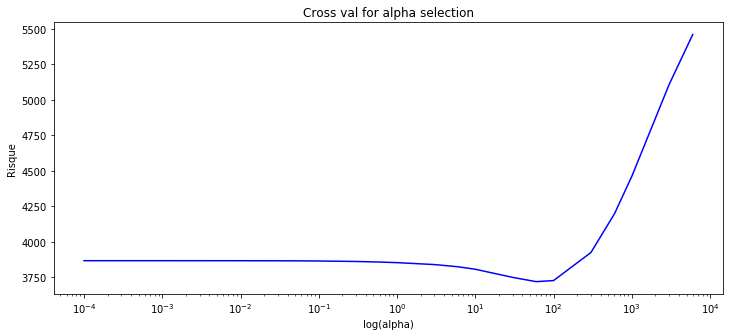

In [630]:
#On affiche le graph des 50 premières p-values
plt.figure(figsize=(12,5))
plt.plot((alphas),R,"b-")
plt.title("Cross val for alpha selection", fontsize = 12)
plt.xlabel("log(alpha)")
plt.ylabel("Risque")
plt.xscale("log")

plt.show()

In [631]:
#On calcul le risque associé
model_ridge = linear_model.Ridge(alphabest).fit(X_train,Y_train)
Y_ridge_pred = model_ridge.predict(X_test)
risk_ridge = (Y_test - Y_ridge_pred).T@(Y_test - Y_ridge_pred)/len(Y_test)

print(f"Le risque de prédiction du modèle classique est {round(risque_pred_classique)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP)}")
print(f"Risque de prediction après la fwd selection : {round(risk_predict_fwd)}")
print(f"Risque de prediction après Ridge : {round(risk_ridge)}")

Le risque de prédiction du modèle classique est 4350.0
Le risque de prédiction du modèle ACP est 3079.0
Risque de prediction après la fwd selection : 2937.0
Risque de prediction après Ridge : 3036.0


### Question 13 

In [632]:
#On utilise la regression LassoCV de sklearn
model_lasso = linear_model.LassoCV().fit(X_train,Y_train)

#On en déduit le paramètre optimal de régulation
alpha = model_lasso.alpha_

print(f"Le paramètre optimal de régulation pour le Lasso est : {round(alpha,2)}")

#On calcul le risque de prédiction associé
y_pred_lasso = model_lasso.predict(X_test)

risk_lasso_opti = (Y_test - y_pred_lasso).T@(Y_test - y_pred_lasso)/len(Y_test)
print(f"Risque de prediction après Lasso : {round(risk_lasso_opti)}")

Le paramètre optimal de régulation pour le Lasso est : 7.1
Risque de prediction après Lasso : 3176.0


### Question 14

In [635]:
#On récupère tous les coefs de la regression Lasso
coefs = model_lasso.coef_
lasso_vars = []
i=0

#On récupère les coefficients non-nuls 
for coef in coefs:
    if abs(coef)>0.0001:
        lasso_vars.append(i)
    i+=1
print("Liste des coefficients non nuls selectionnés par Lasso :")
print(lasso_vars)
print("\n")

#On relance une regression linéaire classique à partir des variables selectionnés
model_lasso_OLS = linear_model.LinearRegression().fit(X_train[lasso_vars],Y_train)
y_pred_lasso_OLS = model_lasso_OLS.predict(X_test[lasso_vars])

#Le risque associé
risk_lasso_OLS = (Y_test - y_pred_lasso_OLS).T@(Y_test - y_pred_lasso_OLS)/len(Y_test)

print(f"Le risque de prédiction du modèle classique est {round(risque_pred_classique)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP)}")
print(f"Risque de prediction après la fwd selection : {round(risk_predict_fwd)}")
print(f"Risque de prediction après Ridge : {round(risk_ridge)}")
print(f"Risque de prediction après Lasso : {round(risk_lasso_opti)}")
print(f"Risque de prediction OLS après selection Lasso : {round(risk_lasso_OLS)}")


Liste des coefficients non nuls selectionnés par Lasso :
[13, 58, 123, 167, 174]


Le risque de prédiction du modèle classique est 4350.0
Le risque de prédiction du modèle ACP est 3079.0
Risque de prediction après la fwd selection : 2937.0
Risque de prediction après Ridge : 3036.0
Risque de prediction après Lasso : 3176.0
Risque de prediction OLS après selection Lasso : 3168.0
